# Generative AI and Prompt Engineering
## A program by IISc and TalentSprint
### Mini-Project: Spam Classification

## Problem Statement

Generating a prompt / prompts using no code based LLMs to solve a text classification problem.

Dataset: Spam / ham classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* Understand how to successfuly generate code using LLMs

* Following sections will help you understand the various steps required for text classification:
  * Create text vectorization layer.
  * Create embeddings of words in the message.
  * Visualize the different categories of words.
  * Build a model to classify the messages as Spam or Ham.
  * Get the evaluation score of the model.

## Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Instructions

* Use the SMS Spam collection dataset.
* Based on your understanding of steps required to do text classification from previous assignments, generate the code using LLM to accomplish the task.
* There is no restriction on the number of prompts or choice of LLM.
* Do not use a pretrained model.
* Use any LLM to pass prompts and generate code from it.
* All the sections are to be solved by making use of prompts.
* Feel free to add/delete ccode cells as you may require.
* Use any number of code cells/prompts to solve any particular section.

## Parameters of evaluations

* Accuracy on Test data set
* Choice of preprocessing steps
* Model Architecture
* Design parameters choice
* Number of experiments conducted
* Parameter tuning
* Visualizations
  * Train validation loss & other metrics
  * Word clouds of words in each category
  * Embeddings visualizations


## **HINT**

Please take hints from the assignment released in module 1, **[M1_AST_02_TextVectorization_and_Embedding_Layers](https://drive.google.com/drive/folders/17J8eaehDycpqypduEcmUyubyXlFr-gD2?usp=drive_link)**

## Grading = 10 Points

### Import Neccesary Packages

In [ ]:
# Please feel free to add/remove installations here

# Initial Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Data (1 point)

In [ ]:
## Add your prompt and code here
"""
Prompt Used :
You are Python Developer working on google colab
You want to read csv file directly from kaggle url . Please provide the code to do the task.

Output :
To read a CSV file directly from a Kaggle URL in Google Colab, follow these steps:

  Install Kaggle API: First, you need to install the Kaggle API if you haven't already.

  Authenticate with Kaggle: Download your Kaggle API key and upload it to Colab.

  Download the CSV file: Use the Kaggle API to download the dataset directly.

  Read the CSV file: Use pandas to read the CSV file.

"""

# Step 1: Install Kaggle API
!pip install kaggle

# # Step 2: Upload your Kaggle API key
from google.colab import files
files.upload()

# Step 3: Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset using the Kaggle API
# Replace 'dataset-owner/dataset-name' with the correct dataset name or URL fragment
!kaggle datasets download -d uciml/sms-spam-collection-dataset

# Step 5: Unzip the downloaded dataset
!unzip sms-spam-collection-dataset.zip

# Step 6: Read the CSV file using pandas
import pandas as pd

# Replace 'file.csv' with the actual file name
spam_data = pd.read_csv(r'/content/spam.csv', encoding="latin1")

# Display the first few rows of the dataframe
spam_data.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spam.csv                


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Check for the Unnamed Columns and there values.
unnamed_data = spam_data[spam_data[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]].notna().any(axis=1)]
print(unnamed_data.shape)
unnamed_data.head()

(50, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [ ]:
# Print the text contain in all 4 columns.
def print_full_message(index):
  print("#"*100)
  print("Message at index : ", index)
  print(unnamed_data["v2"].loc[index])
  print(unnamed_data["Unnamed: 2"].loc[index])
  print(unnamed_data["Unnamed: 3"].loc[index])
  print(unnamed_data["Unnamed: 4"].loc[index])


index = 95
print_full_message(index)
index = 281
print_full_message(index)
index = 444
print_full_message(index)

####################################################################################################
Message at index :  95
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
 PO Box 5249
 MK17 92H. 450Ppw 16"
nan
####################################################################################################
Message at index :  281
\Wen u miss someone
 the person is definitely special for u..... But if the person is so special
 why to miss them
 just Keep-in-touch\" gdeve.."
####################################################################################################
Message at index :  444
\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAROUND! HOWDY GORGEOUS
 HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\""
nan
nan


In [ ]:
# From above it is clear with data points message is spread across columns

"""
Prompt Used :
You are Python Developer
You are provided with 4 columns, you want to join all 4 columns to form 5th columns name v2 if column value is not None

Output:
To join the values of four columns into a fifth column named v2 in a DataFrame, while ensuring that only non-None (or non-NaN) values are included, you can use the following approach in Python with pandas.

Explanation:
apply(lambda x: ''.join(filter(None, x)), axis=1): This lambda function is applied row-wise (axis=1). It filters out any None (or NaN) values from each row, then joins the remaining values together into a single string.
The filter(None, x) ensures that only non-None values are considered for joining.
Output:
For the sample data provided, the output DataFrame would look like this:

"""
spam_data["v2"] = spam_data[['v2', "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]].astype(str).apply(lambda x: ''.join(filter(None, x)), axis=1)
spam_data = spam_data[["v1", "v2"]]
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...nannannan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Remove the stopwords, punctuations from message, Since it will reduce the size of the message

"""
Prompt Used :
You are the Python Developer working on google colab notebook.
Task :
You are provided with pandas Dataframe "spam_data" and 2 columns "v1" and "v2".
You are tasked to remove all special characters, stopwords, punctuation from the columns "v2" .

Please provide the code to implement the task

Output :
To clean the text data in the v2 column of your DataFrame spam_data by removing special characters, stopwords, and punctuation,
 you can follow the steps below. We'll use pandas, re (for regular expressions), and nltk (for stopwords).

Explanation:
Remove Punctuation: text.translate(str.maketrans('', '', string.punctuation)) removes all punctuation marks.
Remove Special Characters and Digits: re.sub(r'[^A-Za-z\s]', '', text) removes any character that is not an alphabet or space.
Convert to Lowercase: text.lower() ensures all text is in lowercase.
Remove Stopwords: The list of stopwords is filtered out using nltk.corpus.stopwords.
Notes:
Ensure that you replace the sample DataFrame initialization with your actual spam_data DataFrame.
The cleaned text is stored in a new column v2_cleaned in the DataFrame.
Example Output:
For example, if your original v2 column had the text "Hello!!! How are you?", the cleaned text in v2_cleaned would be "hello".
"""

import re
import nltk
from nltk.corpus import stopwords
import string

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the clean_text function to the 'v2' column
spam_data['v2_cleaned'] = spam_data['v2'].apply(clean_text)

# Display the DataFrame
spam_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2,v2_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...nannannan,ok lar joking wif u oninannannan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already saynannannan
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnan...


In [ ]:
## Display the raw and cleaned message
def display_cleaned_message(index):
  print("#"*10, f" Value at index : {index} ", "#"*10)
  print("Raw : ", spam_data["v2"].loc[index])
  print("Cleaned : ", spam_data["v2_cleaned"].loc[index])


display_cleaned_message(0)
display_cleaned_message(2)

##########  Value at index : 0  ##########
Raw :  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...nannannan
Cleaned :  go jurong point crazy available bugis n great world la e buffet cine got amore watnannannan
##########  Value at index : 2  ##########
Raw :  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18'snannannan
Cleaned :  free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18snannannan


In [ ]:
# Get no of words in cleaned text
spam_data["no_of_tokens"] = spam_data["v2_cleaned"].str.split().str.len()
spam_data.head()

,v1,v2,v2_cleaned,no_of_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...nannannan,ok lar joking wif u oninannannan,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,23
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already saynannannan,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnan...,8


In [ ]:
print("Maximum Length of any Sentence is : ", spam_data["no_of_tokens"].max())

Maximum Length of any Sentence is :  80


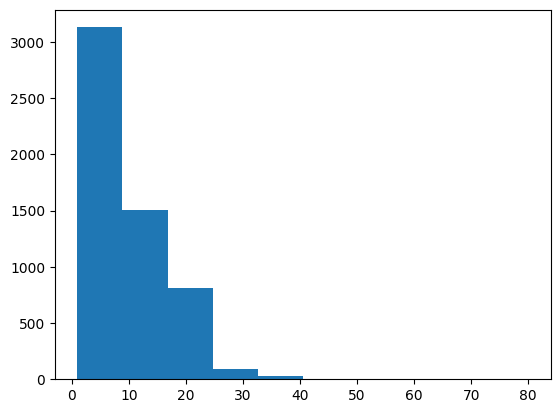

In [ ]:
plt.hist(spam_data["no_of_tokens"], bins=10)
plt.show()

In [ ]:
spam_data[spam_data["no_of_tokens"] > 40]

,v1,v2,v2_cleaned,no_of_tokens
1084,ham,For me the love should start with attraction.i...,love start attractioni feel need every time ar...,80
1578,ham,How to Make a girl Happy? It's not at all diff...,make girl happy difficult make girls happy u n...,59
1862,ham,The last thing i ever wanted to do was hurt yo...,last thing ever wanted hurt didnt think would ...,72
2064,ham,Pass dis to all ur contacts n see wat u get! R...,pass dis ur contacts n see wat u get redim luv...,48
2089,ham,No i'm not. I can't give you everything you wa...,im cant give everything want need actually cou...,42
2157,ham,Sad story of a Man - Last week was my b'day. M...,sad story man last week bday wife didnt wish p...,61
2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,boy loved gal propsd bt didnt mind gv lv lttrs...,66
2379,ham,"Good evening Sir, hope you are having a nice d...",good evening sir hope nice day wanted bring no...,45
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,solve case man found murdered ltdecimalgt ltgt...,49
2433,ham,Indians r poor but India is not a poor country...,indians r poor india poor country says one swi...,71


In [ ]:
# Above we can see there is no spam with len 40 and above, we can keep the data with maximum no of tokens to be 40
spam_data = spam_data[spam_data["no_of_tokens"]<=40].reset_index(drop=True)
print(spam_data.shape)
spam_data.head()

(5556, 4)


,v1,v2,v2_cleaned,no_of_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...nannannan,ok lar joking wif u oninannannan,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,23
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already saynannannan,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around thoughnan...,8


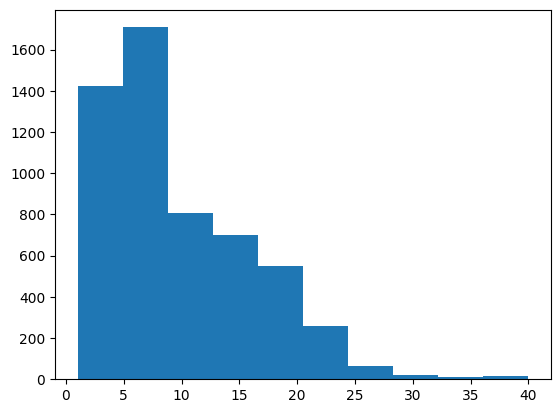

In [ ]:
plt.hist(spam_data["no_of_tokens"], bins=10)
plt.show()

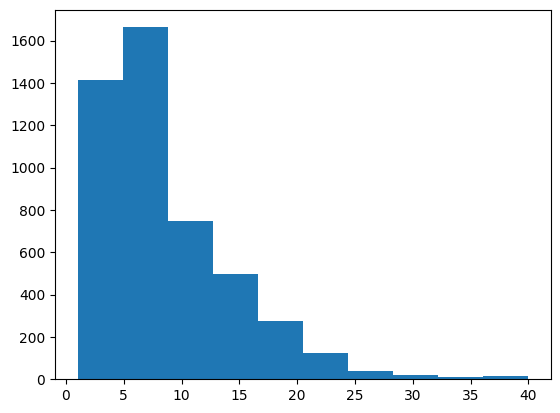

In [ ]:
plt.hist(spam_data[spam_data["v1"]=="ham"]["no_of_tokens"], bins=10)
plt.show()

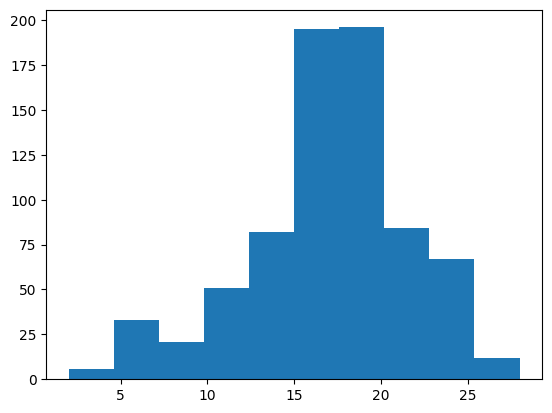

In [ ]:
plt.hist(spam_data[spam_data["v1"]=="spam"]["no_of_tokens"], bins=10)
plt.show()

In [ ]:
# Apply train-test split
"""
Prompt Used :
You are Python Developer, working on google colab,
You are provided with pandas Dataframe spam_data with 2 columns v1 and v2, where v1 is the target and v2 is the feature,
with an imbalance dataset.
Task : Please split the spam_data into train and test data where imbalance ratio is similar, test_size as 20%

Output :
To split the spam_data DataFrame into training and testing sets while maintaining the imbalance ratio between the target classes,
you can use the train_test_split function from scikit-learn with the stratify parameter.


Explanation:
train_test_split: This function is used to split the data into training and testing sets.
test_size=0.2: Specifies that 20% of the data should be reserved for the test set.
stratify=spam_data['v1']: Ensures that the training and test sets have the same distribution of classes as the original dataset, thus maintaining the imbalance ratio.
random_state=42: Ensures reproducibility of the split.
Example Output:
Training data shape: This will give you the number of rows and columns in the training set.
Testing data shape: This will give you the number of rows and columns in the testing set.
Class distribution: The value_counts(normalize=True) function will show the proportion of each class in the v1 column for both the training and testing sets, verifying that the class distribution is maintained.
"""

from sklearn.model_selection import train_test_split
# Split the data while preserving the class distribution
train_data, test_data = train_test_split(
    spam_data[["v1", "v2_cleaned"]].set_axis(
          ["v1", "v2"],
          axis=1
        ),
    test_size=0.2, stratify=spam_data['v1'], random_state=42
)

# Display the size of the splits
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Verify the distribution of the target variable in both sets
print("Training set class distribution:")
print(train_data['v1'].value_counts(normalize=True))

print("\nTesting set class distribution:")
print(test_data['v1'].value_counts(normalize=True))

Training data shape: (4444, 2)
Testing data shape: (1112, 2)
Training set class distribution:
v1
ham     0.865662
spam    0.134338
Name: proportion, dtype: float64

Testing set class distribution:
v1
ham     0.865108
spam    0.134892
Name: proportion, dtype: float64


In [ ]:
train_data.head()

,v1,v2
1588,ham,somewhr someone surely made 4 u god decided pe...
2687,spam,88066 lost 12 helpnannannan
2395,ham,jesus christ bitch im trying give drugs answer...
1298,ham,great hear settling well whats happenin wit ol...
5128,ham,im office dawhere younannannan


### Apply the Vectorization (1 point)

In [ ]:
## Add your prompt and code here
"""
Prompt Used :
You are Data Scientist, working on spam binary classification problem.
You are provide this train_data with 2 columns v1 and v2 where v1 is target columns and v2 is
cleaned message with data shape : (4444, 2) with maximum length of message to be 40.
Task : Please apply Text Vectorizer using Tensorflow on the features column with appropriate parameters

Output :
To apply text vectorization using TensorFlow on the v2 column of your train_data, you can use the TextVectorization layer.
This layer will convert the text data into numerical format, which is required for building machine learning models.
Given that the maximum length of the messages is 40, we will set the max_tokens parameter accordingly.

Explanation:
max_tokens=10000: This parameter sets the size of the vocabulary to 10,000 unique tokens. Adjust this based on your data.
output_sequence_length=40: Ensures that all sequences have a fixed length of 40 tokens. If a message is shorter,
it will be padded; if longer, it will be truncated.
vectorizer.adapt(): This step learns the vocabulary from the v2 column.
vectorizer(train_data['v2']): Transforms the text messages into sequences of integers representing token indices.
Output:
Shape of vectorized data: This will be (4444, 40) where 4444 is the number of samples, and 40 is the sequence length.
Vectorized messages: The first few vectorized messages will be displayed as arrays of integers.
You can now use X_train_vectorized as the input features for training your spam classification model.
"""

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Define the maximum number of unique tokens (words) to keep
max_tokens = 10000  # Adjust based on your dataset size and vocabulary

# Define the maximum length of the sequences (padded/truncated to this length)
max_len = 40  # As specified

# Create the TextVectorization layer
vectorizer = TextVectorization(
    max_tokens=max_tokens,   # Maximum number of unique words (vocabulary size)
    output_mode='int',       # Output integers representing the token indices
    output_sequence_length=max_len  # Pad or truncate sequences to this length
)

# Fit the TextVectorization layer on the text data
vectorizer.adapt(train_data['v2'])

# Transform the text data into vectors
X_train_vectorized = vectorizer(train_data['v2'])

# Display the shape of the vectorized data
print(f"Shape of vectorized data: {X_train_vectorized.shape}")

# Example of the first few vectorized messages
print(X_train_vectorized[:5])

Shape of vectorized data: (4444, 40)
tf.Tensor(
[[4894  112 1311  300   10    2  336  629 2050   23   61    2  100  199
   231  323  282  209    7 7770    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2413  730  704 1025    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [1674 3507 1794    4  185   53 1747  503  626  722    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  50  269 5072   48  219 6940  510 5818    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   4  616 7710   65    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 

In [ ]:
# Get Vocabulary from vectorizer
vocabulary = vectorizer.get_vocabulary()
print(f"vocabulary = {vocabulary}")
print(f"len(vocabulary) = {len(vocabulary)}")

vocabulary = ['', '[UNK]', 'u', 'call', 'im', '2', 'nannannan', 'ur', 'get', 'dont', '4', 'go', 'free', 'got', 'ill', 'ok', 'ltgt', 'know', 'good', 'like', 'come', 'send', 'love', 'time', 'want', 'text', 'going', 'txt', 'need', 'day', 'see', 'sorry', 'one', 'still', 'n', 'r', 'home', 'reply', 'tell', 'new', 'stop', 'think', 'back', 'cant', 'hi', 'mobile', 'take', 'please', 'well', 'claim', 'great', 'phone', 'hey', 'give', 'today', 'week', 'oh', 'lor', 'much', 'hope', 'da', 'make', 'pls', 'ask', 'thats', 'younannannan', 'nownannannan', 'dear', 'said', 'night', 'yeah', 'work', 'happy', 'e', 'yes', 'way', 'right', 'really', 'number', 'c', 'win', 'menannannan', 'wat', 'last', 'prize', 'ive', 'amp', 'would', 'msg', 'miss', 'laternannannan', 'already', 'message', 'life', 'didnt', 'pick', 'find', 'cos', 'cash', '1', 'meet', 'babe', 'say', 'every', 'contact', 'let', 'k', 'anything', '3', 'sent', 'thanks', 'sure', 'someone', 'oknannannan', 'later', 'b', 'also', 'urgent', 'gud', 'nokia', 'many',

In [ ]:
# Since we can see max tokens required is 9245.
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Define the maximum number of unique tokens (words) to keep
max_tokens = 9245 # As specified

# Define the maximum length of the sequences (padded/truncated to this length)
max_len = 40  # As specified

# Create the TextVectorization layer
vectorizer = TextVectorization(
    max_tokens=max_tokens,   # Maximum number of unique words (vocabulary size)
    output_mode='int',       # Output integers representing the token indices
    output_sequence_length=max_len  # Pad or truncate sequences to this length
)

# Fit the TextVectorization layer on the text data
vectorizer.adapt(train_data['v2'])

# Transform the text data into vectors
X_train_vectorized = vectorizer(train_data['v2'])

# Display the shape of the vectorized data
print(f"Shape of vectorized data: {X_train_vectorized.shape}")

# Example of the first few vectorized messages
print(X_train_vectorized[:5])

Shape of vectorized data: (4444, 40)
tf.Tensor(
[[4894  112 1311  300   10    2  336  629 2050   23   61    2  100  199
   231  323  282  209    7 7770    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2413  730  704 1025    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [1674 3507 1794    4  185   53 1747  503  626  722    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [  50  269 5072   48  219 6940  510 5818    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   4  616 7710   65    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 

In [ ]:
# Get Final Vocabulary from vectorizer
vocabulary = vectorizer.get_vocabulary()
print(f"vocabulary = {vocabulary}")
print(f"len(vocabulary) = {len(vocabulary)}")

vocabulary = ['', '[UNK]', 'u', 'call', 'im', '2', 'nannannan', 'ur', 'get', 'dont', '4', 'go', 'free', 'got', 'ill', 'ok', 'ltgt', 'know', 'good', 'like', 'come', 'send', 'love', 'time', 'want', 'text', 'going', 'txt', 'need', 'day', 'see', 'sorry', 'one', 'still', 'n', 'r', 'home', 'reply', 'tell', 'new', 'stop', 'think', 'back', 'cant', 'hi', 'mobile', 'take', 'please', 'well', 'claim', 'great', 'phone', 'hey', 'give', 'today', 'week', 'oh', 'lor', 'much', 'hope', 'da', 'make', 'pls', 'ask', 'thats', 'younannannan', 'nownannannan', 'dear', 'said', 'night', 'yeah', 'work', 'happy', 'e', 'yes', 'way', 'right', 'really', 'number', 'c', 'win', 'menannannan', 'wat', 'last', 'prize', 'ive', 'amp', 'would', 'msg', 'miss', 'laternannannan', 'already', 'message', 'life', 'didnt', 'pick', 'find', 'cos', 'cash', '1', 'meet', 'babe', 'say', 'every', 'contact', 'let', 'k', 'anything', '3', 'sent', 'thanks', 'sure', 'someone', 'oknannannan', 'later', 'b', 'also', 'urgent', 'gud', 'nokia', 'many',

### Design the Model (1 point)

In [ ]:
## Add your prompt and code here
"""
Prompt Used :
You are Data Scientist, working on spam binary classification problem.
Task : Design a Keras Model architecture, with Embedding Layer out_dim = 256 and approriate no of Dense layer and
respective DropOut layers. Your Final Dense Layer should have 1 neuron with appropriate activation.
Note : we are required to extract the untrained embedding layer

Output :
For your spam binary classification problem, here’s a Keras model architecture with an Embedding layer,
appropriate dense layers, and dropout layers. This model is designed for a binary classification task,
so the final dense layer will have 1 neuron with a sigmoid activation function. Additionally,
I'll include a method to extract the untrained embedding layer for further use.
"""
# Model Design

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,), dtype=tf.string)           # shape=(None,), dtype="int64"

# The Text Vectoritation layer
txt_vec_out = vectorizer(inputs)             # Note that this TextVec layer is already apadted on the train dataset

# Define the model architecture
# The Embedding layer
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256, name='embedding')(txt_vec_out)    # the largest integer (i.e. word index) in the input
                                                                                                    # should be no larger than 9243 (vocabulary size).
x = layers.Dense(128, activation="relu")(embedded)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 40)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 40, 256)             │       2,366,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,407,937 (9.19 MB)

 Trainable params: 2,407,937 (9.19 MB)

 Non-trainable params: 0 (0.00 B)

### Extract the Embeddings before Training (1 point)

In [ ]:
## Add your prompt and code here
# Extract the untrained embedding layer
embedding_layer = model.get_layer('embedding')
embedding_weights = embedding_layer.get_weights()[0]  # Extract the weights of the embedding layer

# Display the shape of the embedding weights
print(f"Shape of embedding weights: {embedding_weights.shape}")

Shape of embedding weights: (9245, 256)


In [ ]:
"""
Prompt :
You are having adapted Tensorflow textvectorizer how to get word frequency ?

Output :
To get word frequencies from an adapted TextVectorization layer in TensorFlow,
you need to access the vocabulary learned by the vectorizer.
The TextVectorization layer provides a method to get the vocabulary,
which can then be used to calculate the frequency of each word.
"""
vocabulary = vectorizer.get_vocabulary()
word_index = {word: index for index, word in enumerate(vocabulary)}

# Create a DataFrame to hold the counts
word_counts = np.zeros(len(vocabulary))

# Count word occurrences
for row in X_train_vectorized:
    unique_words = np.unique(row.numpy())
    for word_id in unique_words:
        if word_id > 0:  # Skip padding token
            word_counts[word_id] += 1

# Create a DataFrame to view word frequencies
word_frequency_df = pd.DataFrame({
    'word': [word for word, index in sorted(word_index.items(), key=lambda x: x[1])],
    'frequency': word_counts
})

# Sort the DataFrame by frequency in descending order
word_frequency_df = word_frequency_df.sort_values(by='frequency', ascending=False)

# Display the most common words and their frequencies
print(word_frequency_df.head(20))

         word  frequency
2           u      632.0
3        call      417.0
4          im      357.0
6   nannannan      316.0
5           2      298.0
8         get      278.0
7          ur      236.0
10          4      211.0
9        dont      210.0
11         go      206.0
14        ill      192.0
13        got      187.0
15         ok      187.0
17       know      178.0
18       good      170.0
19       like      166.0
20       come      162.0
16       ltgt      160.0
12       free      159.0
21       send      155.0


In [ ]:
test_words = ['u', 'call', 'im', 'get', 'ill', 'know', 'come', 'free', 'send', 'like']
print(f"{'Word':<15} {'Index'}")
print("="*30)
for word in test_words:
    print(f"{word:<15} {vocabulary.index(word)}")

Word            Index
u               2
call            3
im              4
get             8
ill             14
know            17
come            20
free            12
send            21
like            19


In [ ]:
# Embedding dimension
embedding_weights[vocabulary.index('good')].shape

(256,)

In [ ]:
from sklearn.decomposition import PCA

# Create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
# n_components in PCA specifies the no. of dimensions
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_untrained_emb = pca.fit_transform(embedding_weights)
reduced_untrained_emb.shape

(9245, 2)

In [ ]:
# Reduced embedding for word 'good'
reduced_untrained_emb[vocabulary.index('good')]

array([0.07236306, 0.03319119], dtype=float32)

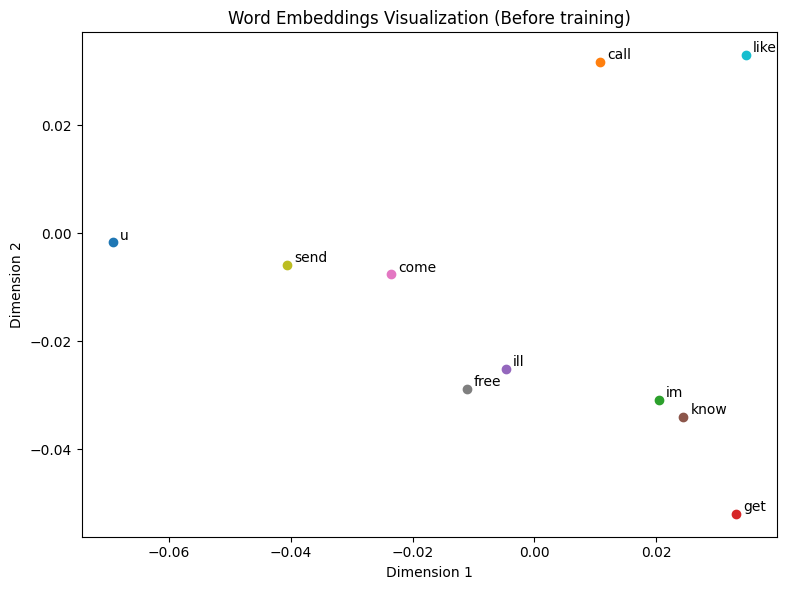

In [ ]:
# Visualize the embeddings
test_words = ['u', 'call', 'im', 'get', 'ill', 'know', 'come', 'free', 'send', 'like']

plt.figure(figsize=(8, 6))
for word in test_words:
    if word != '':  # Skip the empty string token
        x, y = reduced_untrained_emb[vocabulary.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

plt.title("Word Embeddings Visualization (Before training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

### Train the Model (1 point)

In [ ]:
## Add your prompt and code here
# Convert target labels to binary format
train_data["v1"] = train_data['v1'].apply(lambda x: np.array([1]) if x == 'spam' else np.array([0]))
train_data["v1"] = train_data["v1"].apply(lambda x: tf.reshape(x, (-1, 1)))
train_data["v2"] = train_data['v2'].apply(lambda x: vectorizer(x))

In [ ]:
history = model.fit(train_data, epochs=10, batch_size=32, validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

In [ ]:
train_data

,v1,v2
1588,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(4894, shape=(), dtype=int64), tf.Te..."
2687,"((tf.Tensor(1, shape=(), dtype=int64)))","(tf.Tensor(2413, shape=(), dtype=int64), tf.Te..."
2395,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(1674, shape=(), dtype=int64), tf.Te..."
1298,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(50, shape=(), dtype=int64), tf.Tens..."
5128,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(4, shape=(), dtype=int64), tf.Tenso..."
...,...,...
351,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(133, shape=(), dtype=int64), tf.Ten..."
3047,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(2, shape=(), dtype=int64), tf.Tenso..."
5185,"((tf.Tensor(1, shape=(), dtype=int64)))","(tf.Tensor(10, shape=(), dtype=int64), tf.Tens..."
1436,"((tf.Tensor(0, shape=(), dtype=int64)))","(tf.Tensor(82, shape=(), dtype=int64), tf.Tens..."


### During Training Collect the loss and Metrics of Train and Validation. Plot the Metrics after Training (1 point)

In [ ]:
## Add your prompt and code here

### Calculate and Display the Test Performance (1 point)

In [ ]:
## Add your prompt and code here

### Extract the Embeddings after Training (1 point)

In [ ]:
## Add your prompt and code here

### Reduce the Embeddings using PCA (1 point)

In [ ]:
## Add your prompt and code here

### Plot the Embeddings in 2D (1 point)

In [ ]:
## Add your prompt and code here